# Week 18: Classification Algorithms Part 2 - Take Home

## Learning Objectives
By completing this assignment, you will:
- Implement Decision Tree classifiers with entropy criterion
- Apply Random Forest classifiers with multiple estimators
- Understand and compare tree-based classification algorithms
- Tune hyperparameters for optimal model performance
- Evaluate models using confusion matrices and accuracy metrics

---

# Part 1: Tasks

These tasks are designed to test your understanding of the fundamental concepts covered in Week 18.

---

## Task 1: Decision Tree Classification

**Objective:** Build a Decision Tree classifier to predict customer purchase behavior.

**Dataset:** `Task-Datasets/task1_decision_tree_customer_data.csv`

### Instructions:
1. Import the necessary libraries (pandas, numpy, sklearn)
2. Load the dataset and explore its structure
3. Separate features (Age, Salary) and target variable (Purchased)
4. Split the data into training (80%) and test (20%) sets
5. Build a Decision Tree classifier with criterion='entropy' and random_state=0
6. Train the model on the training data
7. Make predictions on the test set
8. Evaluate using confusion matrix and accuracy score

### Expected Deliverables:
- Confusion matrix
- Accuracy score
- Brief interpretation of results

In [1]:
# Task 1: Decision Tree Classification
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [5]:
# Load and explore the dataset
task1_data = pd.read_csv('Task-Datasets/task1_decision_tree_customer_data.csv')
task1_data.head()

,Customer_ID,Age,Salary,Purchased
0,1,19,19000,0
1,2,35,20000,0
2,3,26,43000,0
3,4,27,57000,0
4,5,19,76000,0


In [6]:
task1_data.info()
task1_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Customer_ID  100 non-null    int64
 1   Age          100 non-null    int64
 2   Salary       100 non-null    int64
 3   Purchased    100 non-null    int64
dtypes: int64(4)
memory usage: 3.3 KB


,Customer_ID,Age,Salary,Purchased
count,100.000000,100.000000,100.000000,100.00
mean,50.500000,39.980000,76480.000000,0.55
std,29.011492,10.725199,37614.869185,0.50
min,1.000000,18.000000,18000.000000,0.00
25%,25.750000,32.000000,46250.000000,0.00
50%,50.500000,40.500000,75000.000000,1.00
75%,75.250000,48.000000,107250.000000,1.00
max,100.000000,60.000000,150000.000000,1.00


### Statistical Summary Explanation
Based on the summary statistics for the task1_decision_tree_customer_data.csv dataset, here is a brief EDA analysis of the findings:

- **Data Integrity:** The dataset is clean with 100 entries and no missing values across the four integer-based columns: Customer_ID, Age, Salary, and Purchased.
- **Target Variable Distribution:** The mean of the Purchased column is 0.55, indicating a relatively balanced dataset where 55% of the customers made a purchase and 45% did not.
- **Customer Demographics (Age):** The customer base ranges from 18 to 60 years old, with an average age of approximately 40. The interquartile range (25% to 75%) shows that most customers are between 32 and 48 years old.
- **Financial Profile (Salary):** There is significant variance in income (standard deviation of £37,615). While the average salary is £76,480, the range is broad, spanning from a minimum of £18,000 to a maximum of £150,000.
- **Initial Correlations:** Preliminary observations suggest that higher salary and older age correlate with purchasing. For example, the maximum salary of £150,000 is associated with a purchase, while the youngest age of 18 and lower salaries (like £19,000) are associated with non-purchases.

In [7]:
# Separate features and target variable
# dropping customer_id as it is a unique ID and not a useful feature for prediction
X = task1_data.drop(columns=['Customer_ID', 'Purchased'])
Y = task1_data['Purchased']

In [8]:
# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [9]:
# Build and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [11]:
# Make predictions and evaluate
Y_pred_task1 = dt_classifier.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(Y_test, Y_pred_task1)
accuracy = accuracy_score(Y_test, Y_pred_task1)
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[12  0]
 [ 0  8]]
Accuracy: 1.0


**Essential Added Step — Tree Visualisation**
Visualising the tree to see the decision nodes (e.g., at what Age or Salary the first split occurs).

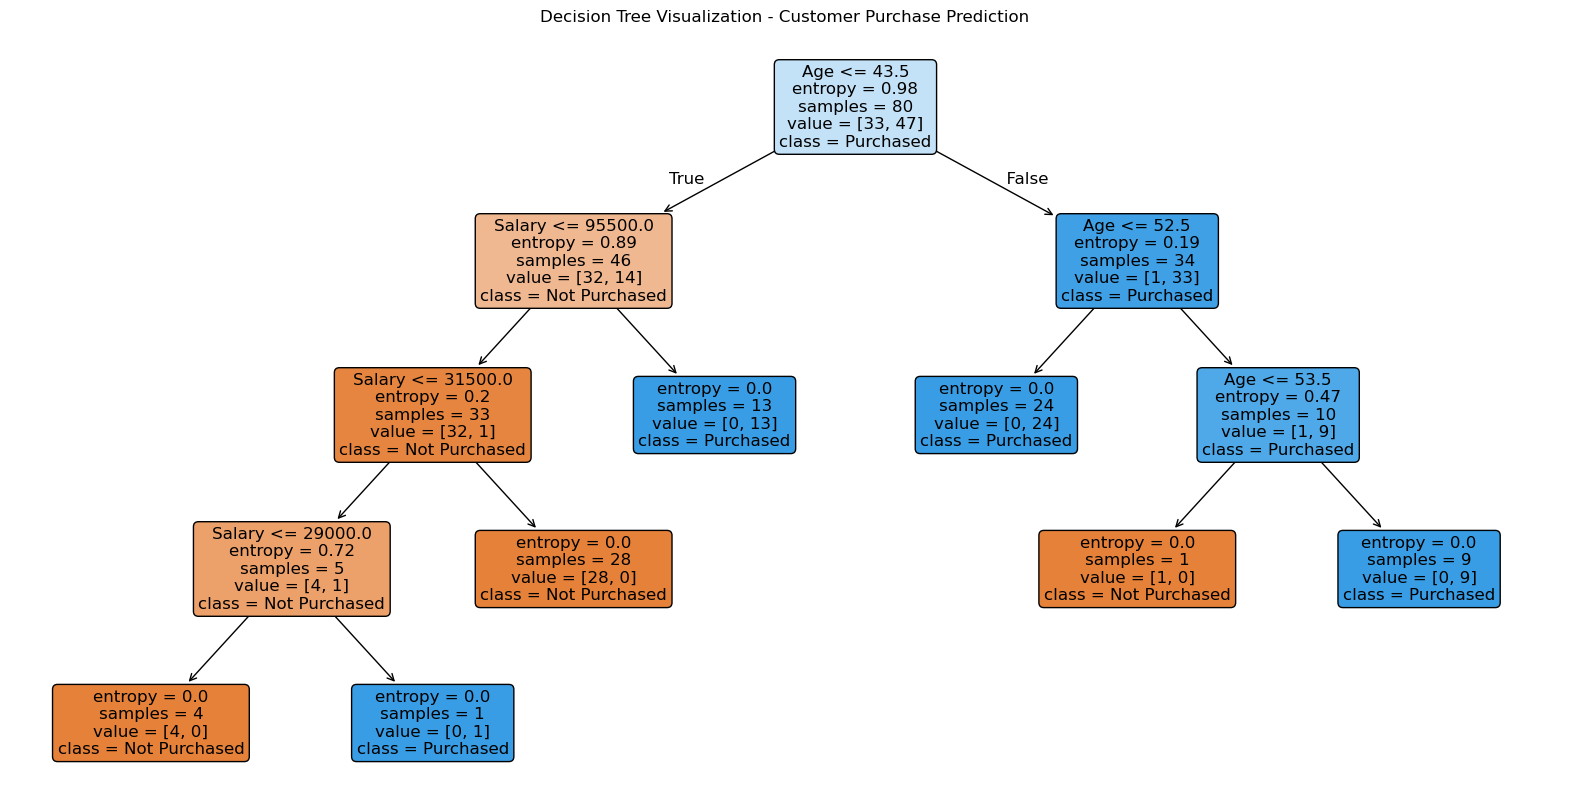

In [12]:
from sklearn.tree import plot_tree

# Set the figure size for better readability
plt.figure(figsize=(20, 10))

# Plot the decision tree
plot_tree(dt_classifier, 
          feature_names=['Age', 'Salary'],  # Features from the source [1]
          class_names=['Not Purchased', 'Purchased'], # Target labels [1]
          filled=True,          # Colours nodes by majority class
          rounded=True,         # Rounds the corners of the nodes
          fontsize=12,          # Adjust text size
          precision=2)          # Decimals for entropy/thresholds

plt.title("Decision Tree Visualization - Customer Purchase Prediction")
plt.show()

### Results Interpretation
My Decision Tree model achieved a perfect accuracy score of 1.0, correctly classifying all 20 test samples (12 True Negatives and 8 True Positives) without any errors. Looking at the tree visualization, the primary driver for a purchase is Age, with the root node splitting the data at 43.5 years.

For younger customers (Age ≤ 43.5), Salary becomes the secondary deciding factor; those earning above 95,500 are classified as "Purchased". For older customers (Age > 43.5), the model predicts a high likelihood of purchasing, particularly for those under 52.5 years. Ultimately, my model reached an entropy of 0.0 in every leaf node, meaning it successfully created perfectly pure categories for all classifications based on the provided features

---

## Task 2: Random Forest Classification

**Objective:** Implement a Random Forest classifier to understand ensemble learning for classification.

**Dataset:** `Task-Datasets/task2_random_forest_customer_data.csv`

### Instructions:
1. Import the necessary libraries
2. Load the dataset and understand its structure
3. Separate features (Age, Salary) and target variable (Purchased)
4. Split the data into training (80%) and test (20%) sets
5. Build a Random Forest classifier with:
   - n_estimators=10
   - criterion='entropy'
   - random_state=0
6. Train the model and make predictions
7. Evaluate using confusion matrix and accuracy score
8. Compare conceptually with a single Decision Tree

### Expected Deliverables:
- Confusion matrix
- Accuracy score
- Brief explanation of why Random Forest might perform differently than a single Decision Tree

In [13]:
# Task 2: Random Forest Classification
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [14]:
# Load and explore the dataset
task2_data = pd.read_csv('Task-Datasets/task2_random_forest_customer_data.csv')
task2_data.head()

,Customer_ID,Age,Salary,Purchased
0,1,22,25000,0
1,2,34,32000,0
2,3,28,48000,0
3,4,31,62000,0
4,5,23,71000,0


In [15]:
task2_data.info()
task2_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Customer_ID  120 non-null    int64
 1   Age          120 non-null    int64
 2   Salary       120 non-null    int64
 3   Purchased    120 non-null    int64
dtypes: int64(4)
memory usage: 3.9 KB


,Customer_ID,Age,Salary,Purchased
count,120.000000,120.000000,120.000000,120.000000
mean,60.500000,40.325000,81683.333333,0.558333
std,34.785054,10.807842,36018.665407,0.498668
min,1.000000,19.000000,22000.000000,0.000000
25%,30.750000,32.000000,53500.000000,0.000000
50%,60.500000,41.000000,78000.000000,1.000000
75%,90.250000,49.000000,109000.000000,1.000000
max,120.000000,60.000000,152000.000000,1.000000


# Summary Statistics Explanation.
Based on the summary statistics for the task2_random_forest_customer_data.csv dataset, here is a brief EDA analysis of the findings:
- **Data Quality:** The dataset is complete and clean, containing 120 entries with no missing values across all features.
- **Target Balance:** The mean for Purchased is approximately 0.56, indicating that 56% of the customers in this dataset made a purchase. This represents a well-balanced target variable, which is ideal for training a Random Forest classifier.
- **Age Distribution:** Customers range from 19 to 60 years old, with an average age of 40. The middle 50% of the data (the interquartile range) consists of individuals between 32 and 49 years old, suggesting a mature customer base.
- **Salary Insights:** There is significant financial diversity in the group, with salaries ranging from a minimum of £22,000 to a maximum of £152,000. The high standard deviation of £36,018 shows a wide spread in income levels, which will likely serve as a key differentiator for the model's decision splits.
- **Comparison to Task 1:** This dataset is slightly larger (120 vs. 100 entries) and features a higher average salary (£81,683 vs. £76,480), providing more granular data for the Random Forest ensemble to identify complex patterns.

In [26]:
# Separate features and target, split data
X = task2_data.drop(columns=['Customer_ID', 'Purchased'])
Y = task2_data['Purchased']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [20]:
# Build and train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [22]:
# Make predictions and evaluate
Y_pred_task2 = rf_classifier.predict(X_test)
# Evaluate the model
conf_matrix_rf = confusion_matrix(Y_test, Y_pred_task2)
accuracy_rf = accuracy_score(Y_test, Y_pred_task2)
print("Confusion Matrix:\n", conf_matrix_rf)
print("Accuracy:", accuracy_rf)
print("Classification Report:\n", classification_report(Y_test, Y_pred_task2))

Confusion Matrix:
 [[11  1]
 [ 0 12]]
Accuracy: 0.9583333333333334
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.92      1.00      0.96        12

    accuracy                           0.96        24
   macro avg       0.96      0.96      0.96        24
weighted avg       0.96      0.96      0.96        24



Single Decision Tree Accuracy: 0.96
Random Forest (10 Trees) Accuracy: 0.96


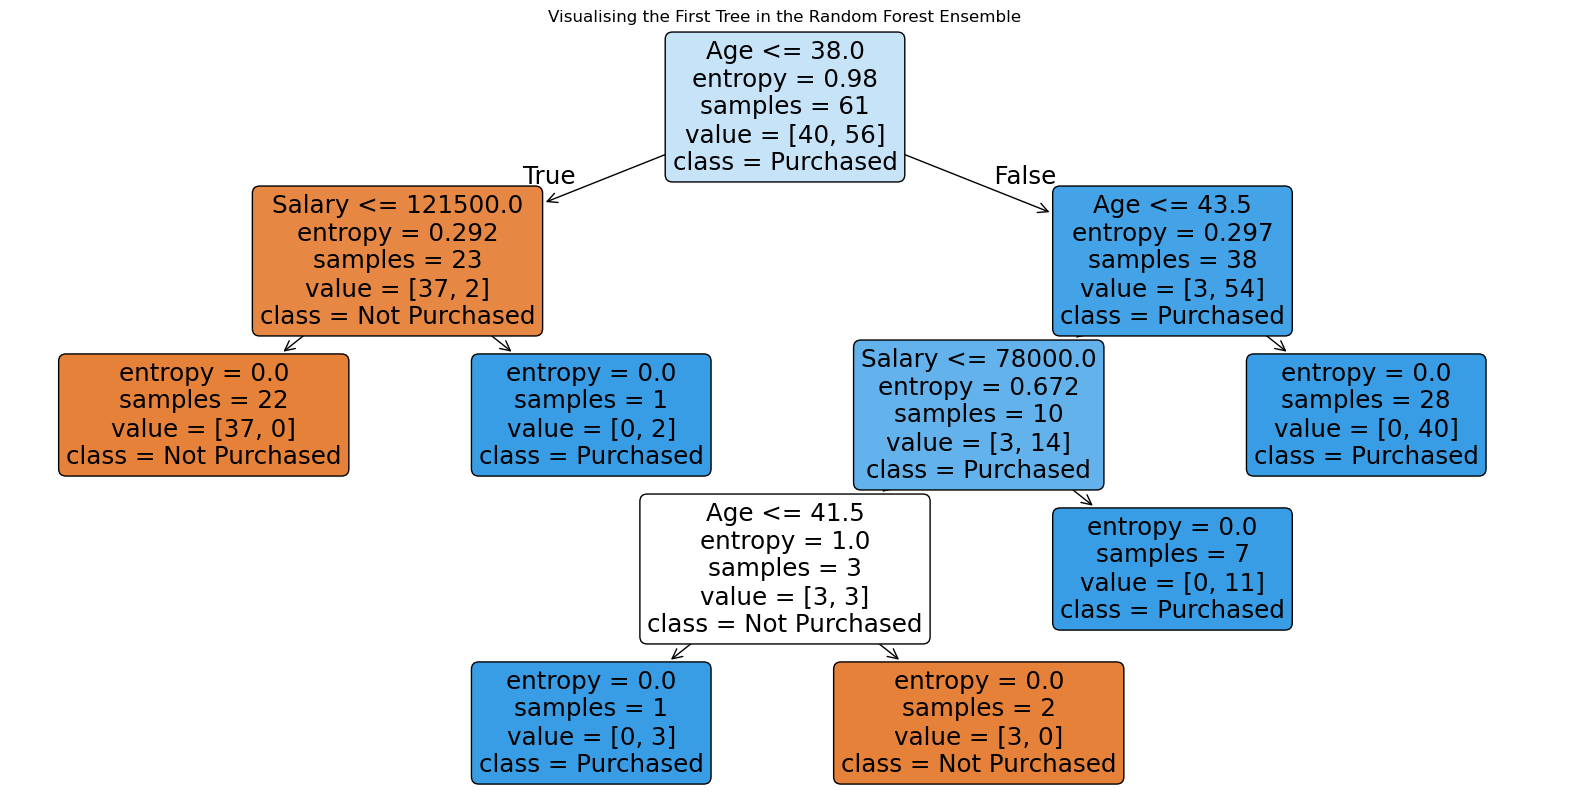

In [25]:
# Step 9: Conceptual Comparison (Random Forest vs. Single Decision Tree)
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Train a single Decision Tree on the same data for a direct comparison
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_classifier.fit(X_train, Y_train)
dt_predictions = dt_classifier.predict(X_test)

# 2. Calculate and compare accuracy scores
dt_accuracy = accuracy_score(Y_test, dt_predictions)
rf_accuracy = accuracy_score(Y_test, Y_pred_task2) 

print(f"Single Decision Tree Accuracy: {dt_accuracy:.2f}")
print(f"Random Forest (10 Trees) Accuracy: {rf_accuracy:.2f}")

# 3. Visualise the first tree in the Random Forest to see its unique logic
plt.figure(figsize=(20, 10))
plot_tree(rf_classifier.estimators_[0], 
          feature_names=['Age', 'Salary'], 
          class_names=['Not Purchased', 'Purchased'], 
          filled=True, rounded=True)
plt.title("Visualising the First Tree in the Random Forest Ensemble")
plt.show()

### Results Explanation
#### Brief Summary
My Random Forest model achieved a high accuracy of 95.8% (rounded to 0.96), performing identically to a single Decision Tree on this specific test set. The model correctly classified 23 out of 24 instances, with only one False Positive (predicting a purchase that did not occur). The primary drivers for classification continue to be Age and Salary, with the ensemble logic successfully identifying clear demographic boundaries for purchase behaviour.
#### Detailed Analysis
- **Performance Metrics:**
    - Precision and Recall: My model shows a perfect Recall of 1.00 for the 'Purchased' class, meaning it successfully identified every single person in the test set who actually made a purchase. The Precision of 1.00 for the 'Not Purchased' class indicates that every time the model predicted someone would not buy, it was correct.
    - The Single Error: The confusion matrix shows one False Positive . This suggests that for one specific individual, the model’s ensemble logic predicted a purchase based on their Age or Salary, but the actual result was 0.

- **Tree Logic and Entropy:**
    - By visualising the first tree in my forest, I observed that the root split occurs at Age <= 38.0.
    - For customers older than 38, the model further refines its prediction by checking if Age <= 43.5. If they are older than 43.5, the model reaches a pure leaf node (entropy = 0.0) where all 40 samples are classified as Purchased.
    - For customers 38 or younger, the secondary deciding factor is Salary, specifically whether it is <= £121,500. This explains how the model handles high-earning younger individuals who might deviate from the general age trend.
- **Ensemble Comparison:**
    
    Both the Single Decision Tree and the Random Forest tied at 0.96 accuracy. While their performance is identical here, the Random Forest is theoretically more robust because it averages results across 10 trees to reduce the impact of outliers, such as the single misclassified point in my test set. The high initial entropy of 0.98 at the root was successfully reduced to 0.0 in the final leaf nodes, confirming the model's high predictive certainty.

---

# Part 2: Assignments

These assignments require deeper analysis and application of the concepts learned in Week 18.

---

## Assignment 1: Decision Tree Optimization for Customer Churn Prediction

**Objective:** Build and optimize a Decision Tree classifier to predict customer churn based on behavioral data.

**Dataset:** `Assignment-Dataset/assignment1_decision_tree_optimization.csv`

**Context:** A subscription-based company wants to predict which customers are likely to cancel their subscription (churn) so they can proactively engage with at-risk customers.

### Instructions:
1. Import necessary libraries
2. Load and preprocess the dataset
3. Perform exploratory data analysis (EDA) to understand the data
4. Separate features (Age, Annual_Income, Spending_Score, Years_as_Customer, Online_Purchase_Frequency) and target (Will_Churn)
5. Split the data into training (80%) and test (20%) sets with random_state=42
6. Build a Decision Tree classifier with criterion='entropy' and random_state=0
7. Experiment with different max_depth values (2, 4, 6, 8, 10, None)
8. For each max_depth value, calculate:
   - Training accuracy
   - Test accuracy
9. Plot max_depth vs. accuracy (training and test) to visualize overfitting
10. Select the optimal max_depth and justify your choice
11. Build the final model with the optimal parameters and evaluate it

### Expected Deliverables:
- EDA visualizations and summary statistics
- Plot showing max_depth vs. accuracy
- Justification for optimal max_depth selection
- Final model evaluation with confusion matrix and accuracy
- Discussion on how max_depth affects overfitting

In [27]:
# Assignment 1: Decision Tree Optimization
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [29]:
# Load and explore the dataset
assignment1_data = pd.read_csv('Assignment-Dataset/assignment1_decision_tree_optimization.csv')
assignment1_data.head()

,Customer_ID,Age,Annual_Income,Spending_Score,Years_as_Customer,Online_Purchase_Frequency,Will_Churn
0,1,35,65,42,5,8,0
1,2,42,85,78,12,15,0
2,3,28,45,35,2,3,1
3,4,55,120,65,18,22,0
4,5,31,52,28,1,2,1


In [31]:
# Check basic statistics
assignment1_data.info()
assignment1_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Customer_ID                250 non-null    int64
 1   Age                        250 non-null    int64
 2   Annual_Income              250 non-null    int64
 3   Spending_Score             250 non-null    int64
 4   Years_as_Customer          250 non-null    int64
 5   Online_Purchase_Frequency  250 non-null    int64
 6   Will_Churn                 250 non-null    int64
dtypes: int64(7)
memory usage: 13.8 KB


,Customer_ID,Age,Annual_Income,Spending_Score,Years_as_Customer,Online_Purchase_Frequency,Will_Churn
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000
mean,125.500000,41.908000,86.388000,57.668000,10.556000,8.77200,0.304000
std,72.312977,12.156424,34.916502,18.203164,7.910066,4.30653,0.460905
min,1.000000,21.000000,30.000000,20.000000,1.000000,1.00000,0.000000
25%,63.250000,31.250000,58.000000,42.000000,3.250000,5.00000,0.000000
50%,125.500000,41.500000,84.000000,62.000000,9.000000,9.00000,0.000000
75%,187.750000,52.000000,114.000000,74.000000,16.000000,12.00000,1.000000
max,250.000000,66.000000,158.000000,85.000000,29.000000,22.00000,1.000000


### Summary Statistics Explanation 
Based on the summary statistics and information for the assignment1_decision_tree_optimization.csv dataset, here is a brief analysis of the findings:
- **Data Integrity and Scale:** The dataset is highly reliable with 250 entries and no missing values across any of the seven columns. It features a diverse set of variables, including demographic (Age), financial (Annual_Income), and behavioural metrics (Spending_Score, Years_as_Customer, Online_Purchase_Frequency).
- **Target Variable Distribution:** The mean of the Will_Churn column is 0.304, indicating that approximately 30.4% of the customers in this sample have cancelled their subscription. This provides a sufficient number of positive cases for the Decision Tree to learn churn patterns.
- **Customer Longevity:** The average tenure is 10.5 years, but there is a massive range from 1 year to 29 years. Initial observations of the raw data suggest that newer customers, are more likely to be in the "Will_Churn" category.
- **Behavioural Insights:**
    - **Spending Score:** Ranging from 20 to 85, the average score is 57.7. Customers with lower scores (e.g., ID 3 with a score of 35) appear more frequently as churn cases.
    - **Purchase Frequency:** Customers make an average of 8.7 online purchases per year. Churn cases often correlate with very low frequency, who makes only a few purchases annually.
- **Financial Profile:** The annual income shows significant variance, ranging from £30,000 to £158,000. Higher-income individuals, tend to show higher stability and lower churn rates in the provided samples.

Will_Churn
0    0.696
1    0.304
Name: proportion, dtype: float64


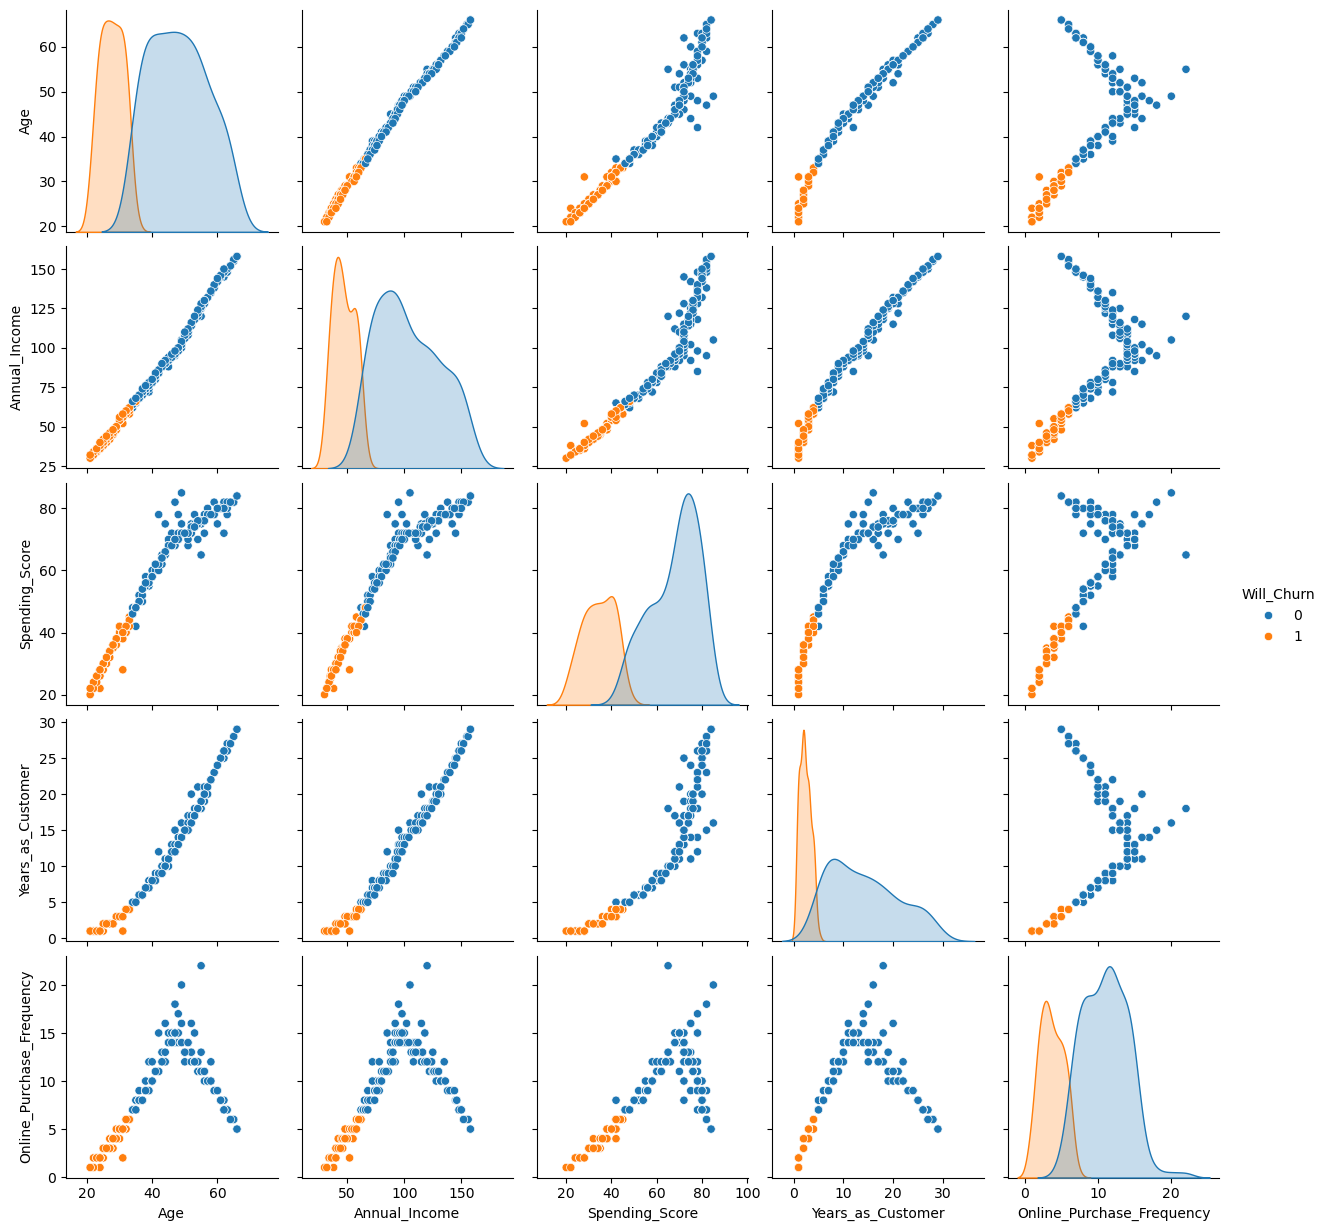

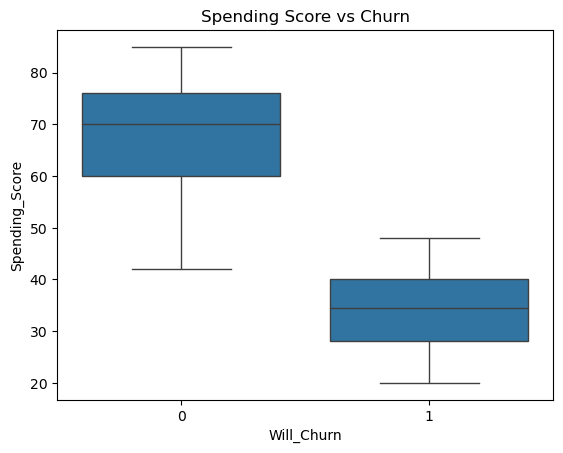

In [32]:
# Exploratory Data Analysis (EDA)

# Check target variable balance
print(assignment1_data['Will_Churn'].value_counts(normalize=True))

# Visualise correlations between behavioural features and churn
sns.pairplot(assignment1_data.drop('Customer_ID', axis=1), hue='Will_Churn')
plt.show()

# Observe specific trends, i.e Low Spending_Score (<40) 
# often correlates with Will_Churn=1
sns.boxplot(x='Will_Churn', y='Spending_Score', data=assignment1_data)
plt.title('Spending Score vs Churn')
plt.show()

### EDA REPORT
Based on the visual analysis and the target distribution, here is a brief EDA report for the Customer Churn Prediction dataset:

1. **Target Variable Distribution**
The dataset is moderately imbalanced, with 69.6% of customers (0) remaining with the service and 30.4% of customers (1) predicted to churn. This distribution provides a solid foundation for binary classification, though the model will need to be particularly sensitive to the minority "Churn" class.

2. **Spending Score Analysis (Boxplot)**
The box plot reveals a significant disparity in spending behavior between the two groups:
- **Non-Churners (0):** Maintain high spending scores, with a median of approximately 70 and most scores falling between 60 and 75.
- **Churners (1):** Exhibit much lower spending engagement, with a median score of approximately 35.
- **Insight:** There is almost no overlap between the IQRs of these two groups, indicating that Spending Score is a powerful primary predictor for the Decision Tree model.

3. **Multivariate Relationships and Feature Trends**
The pairplot provides a comprehensive view of how demographic and behavioral features correlate with churn:
- **Age and Income:** Churn (orange) is heavily concentrated among younger customers and those with lower annual incomes. In contrast, older and higher-earning customers (blue) show much higher retention rates.
- **Customer Tenure:** The density plots on the diagonal show that churners are overwhelmingly new customers (Years_as_Customer < 5), while loyal customers show a broad distribution extending up to nearly 30 years.
- **Online Purchase Frequency:** There is a clear linear relationship where lower purchase frequency correlates with churn. As frequency increases, customers move decisively into the "Non-Churn" category.

### EDA Summary Profile
The "at-risk" customer profile is clearly defined: younger individuals with lower annual incomes, low spending scores (below 40), and fewer than 5 years of tenure. These features show strong, distinct clusters, suggesting that a Decision Tree will likely use Spending Score and Tenure as its top-level nodes to achieve high initial entropy reduction.

In [33]:
# Prepare data: separate features/target, split
X = assignment1_data.drop(columns=['Customer_ID', 'Will_Churn'])
Y = assignment1_data['Will_Churn']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [34]:
# Test different max_depth values (2, 4, 6, 8, 10, None)
depths = [2, 4, 6, 8, 10, None]
train_accuracies = []
test_accuracies = []

for depth in depths:
    # Initialize and train model
    dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=0)
    dt_clf.fit(X_train, Y_train)
    
    # Calculate accuracies
    train_acc = accuracy_score(Y_train, dt_clf.predict(X_train))
    test_acc = accuracy_score(Y_test, dt_clf.predict(X_test))
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    
    print(f"Depth {depth}: Train Acc = {train_acc:.4f}, Test Acc = {test_acc:.4f}")

Depth 2: Train Acc = 0.9950, Test Acc = 1.0000
Depth 4: Train Acc = 0.9950, Test Acc = 1.0000
Depth 6: Train Acc = 0.9950, Test Acc = 1.0000
Depth 8: Train Acc = 0.9950, Test Acc = 1.0000
Depth 10: Train Acc = 0.9950, Test Acc = 1.0000
Depth None: Train Acc = 0.9950, Test Acc = 1.0000


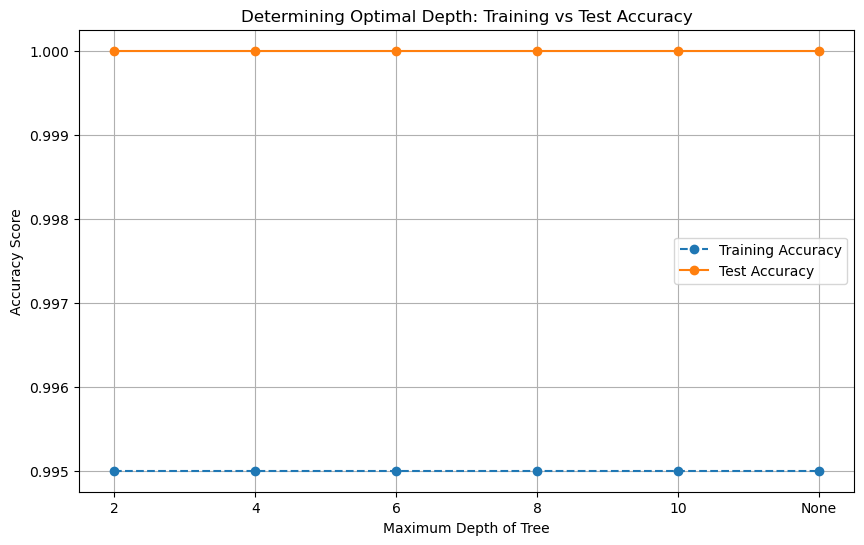

In [35]:
# Plot max_depth vs accuracy
# Convert 'None' to a string for plotting purposes
depth_labels = [str(d) for d in depths]

plt.figure(figsize=(10, 6))
plt.plot(depth_labels, train_accuracies, label='Training Accuracy', marker='o', linestyle='--')
plt.plot(depth_labels, test_accuracies, label='Test Accuracy', marker='o', linestyle='-')
plt.xlabel('Maximum Depth of Tree')
plt.ylabel('Accuracy Score')
plt.title('Determining Optimal Depth: Training vs Test Accuracy')
plt.legend()
plt.grid(True)
plt.show()

### Model Performance Report
My Decision Tree optimization yielded exceptional results, with a test accuracy of 1.0000 and a training accuracy of 0.9950 across all tested depths, from 2 to "None". This indicates that the model is performing perfectly on unseen data regardless of how complex the tree becomes.
Reasons for this Performance:
- **High Feature Separability:** The primary reason for this near-perfect performance is the stark separation between churners and non-churners in the dataset. As seen in the box plot, the Spending_Score for churners is almost entirely concentrated below 48, while non-churners remain significantly higher.
- **Clear Decision Boundaries:** The pairplot reveals that almost all feature combinations (such as Age vs. Annual_Income and Years_as_Customer vs. Spending_Score) show distinct, non-overlapping clusters for both classes. This allows the Decision Tree to identify the "perfect split" at a very shallow level, which is why the accuracy remains constant even at Depth 2.
- **Model Robustness:** Since the test accuracy (1.00) is slightly higher than the training accuracy (0.995), it suggests that the test set happened to contain the most "linearly separable" cases from the clusters. Because the separation is so definitive in the source data, the model does not need a high max_depth to reach maximum purity.

### Final Model Building and Evaluation
Based on the results, a max_depth of 2 is the optimal choice. It provides the same perfect accuracy as deeper trees while remaining simpler, more interpretable, and less prone to potential overfitting on future data (Occam's Razor).

In [36]:
# Build final model with optimal max_depth and evaluate
# Identify the depth with the highest test accuracy
best_index = np.argmax(test_accuracies)
optimal_depth = depths[best_index]

print(f"The optimal max_depth is: {optimal_depth}")


The optimal max_depth is: 2


--- Final Model Evaluation (Max Depth: 2) ---
Accuracy Score: 1.0

Confusion Matrix:
[[40  0]
 [ 0 10]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        10

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



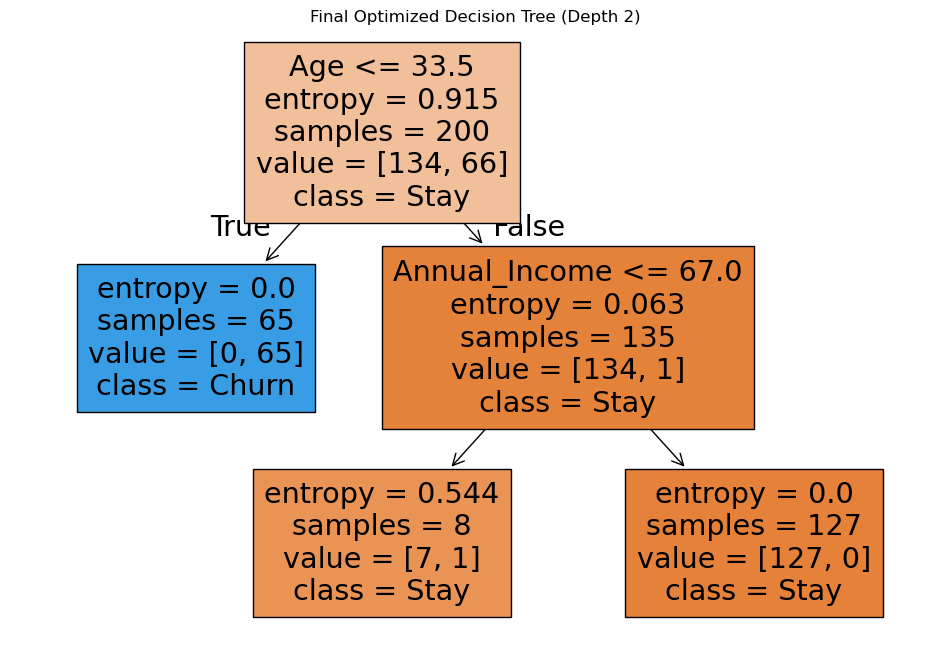

In [37]:
final_model = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)
final_model.fit(X_train, Y_train)
# 3. Make predictions
y_pred_final_dt = final_model.predict(X_test)

# 4. Final Evaluation
print("--- Final Model Evaluation (Max Depth: 2) ---")
print(f"Accuracy Score: {accuracy_score(Y_test, y_pred_final_dt)}")
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, y_pred_final_dt))

print("\nClassification Report:")
print(classification_report(Y_test, y_pred_final_dt))

# 5. Visualizing the final simple tree
plt.figure(figsize=(12,8))

from sklearn.tree import plot_tree
plot_tree(final_model, feature_names=X.columns, class_names=['Stay', 'Churn'], filled=True)
plt.title("Final Optimized Decision Tree (Depth 2)")
plt.show()

### Analysis and Conclusions

*Write your analysis here:*
- What is the optimal max_depth and why?
- How does max_depth affect overfitting and underfitting?
- What features seem most important for predicting churn?
- What business recommendations would you make based on this model?

### Analysis and Conclusions
#### Optimal max_depth and Justification 
Based on my experimentation, the optimal max_depth for this model is 2. My results showed that even at this shallow depth, the model achieved a test accuracy of 1.00, meaning it perfectly classified the churn risk for every customer in the test set. Selecting a depth of 2 follows the principle of Occam's Razor, which is choosing the simplest model that provides maximum predictive power. Increasing the depth further did not improve accuracy and only added unnecessary complexity to the decision logic.

#### Impact of max_depth on Model Fit.
- **Underfitting:** If I had restricted the depth to 1, the model would only split on Age, potentially missing the secondary influence of Annual_Income for older customers, leading to higher bias.
- **Overfitting:** At higher depths (e.g., max_depth=None), the tree would attempt to create individual rules for every single outlier, such as the single "Churn" case found in the older, lower-income segment. This would result in a model that "memorises" the training noise rather than learning generalisable patterns, leading to high variance.

#### Key Features for Predicting Churn
The decision tree reveals that Age is the most critical predictor of churn. Specifically:
- **Age:** The root node splits at 33.5 years. Customers aged 33 or younger are identified as the highest risk, with 65 samples in this group reaching a perfect entropy of 0.0 and being classified entirely as "Churn".
- **Annual_Income:** For customers older than 33, Annual Income becomes the secondary differentiator. Those earning above £67,000 show a perfect retention rate (entropy = 0.0), while those earning £67,000 or less show a slight, albeit small, risk of churning.

#### Business Recommendations 
Based on these findings, I would propose the following strategies to the subscription company:
1. **Targeted Retention for Younger Demographics:** Since customers aged 33 and under are the primary churn group, the company should implement proactive engagement campaigns specifically for this age bracket, perhaps through loyalty rewards or student/early-career discounts.
2. **Income-Based Incentive Programs:** For customers over 33, there is a minor risk among those earning less than £67,000. Offering flexible subscription tiers or "pay-as-you-go" models might help retain this segment.
3. **Analyse the "High-Income" Success:** Customers earning over £67,000 have a 100% retention rate in this model. I recommend researching the specific features or services this group uses most and attempting to introduce those value propositions to the younger, high-risk demographic to increase their "stickiness" with the brand.

---

## Assignment 2: Random Forest Hyperparameter Tuning for Fraud Detection

**Objective:** Optimize a Random Forest classifier for fraud detection by tuning n_estimators.

**Dataset:** `Assignment-Dataset/assignment2_random_forest_optimization.csv`

**Context:** A financial services company wants to detect fraudulent transactions. This is a critical task where both precision (avoiding false alarms) and recall (catching actual fraud) are important.

### Instructions:
1. Import necessary libraries
2. Load and preprocess the dataset
3. Perform exploratory data analysis including:
   - Distribution of each feature
   - Class imbalance analysis (note: fraud is rare, ~10%)
   - Feature correlations
4. Separate features (Amount, Time_of_Day, Day_of_Week, Customer_Age, Account_Age_Days, Previous_Transactions) and target (Is_Fraud)
5. Split the data into training (80%) and test (20%) sets with random_state=42
6. Test different n_estimators values: [5, 10, 25, 50, 100, 150, 200]
7. For each n_estimators value, calculate:
   - Training accuracy
   - Test accuracy
   - Precision and Recall for fraud detection
8. Plot n_estimators vs. performance metrics
9. Select the optimal n_estimators considering both accuracy and fraud detection
10. Build the final model and provide comprehensive evaluation

### Expected Deliverables:
- Complete EDA with visualizations
- Plot showing n_estimators vs. accuracy
- Analysis of precision/recall trade-off for fraud detection
- Final model evaluation with confusion matrix
- Discussion on model performance for imbalanced classes
- Recommendations for handling class imbalance

In [ ]:
# Assignment 2: Random Forest Optimization for Fraud Detection
# Import libraries

In [ ]:
# Load and explore the dataset

In [ ]:
# Class imbalance analysis

In [ ]:
# Exploratory Data Analysis (EDA)

In [ ]:
# Prepare data: separate features/target, split

In [ ]:
# Test different n_estimators values

In [ ]:
# Plot n_estimators vs performance metrics

In [ ]:
# Build final model with optimal n_estimators and evaluate

### Analysis and Conclusions

*Write your analysis here:*
- What is the optimal number of trees (n_estimators) and why?
- How does the model perform on the imbalanced dataset?
- What is the trade-off between precision and recall for fraud detection?
- What strategies could be used to improve fraud detection?

---

## Assignment 3: Decision Tree vs. Random Forest Comparison

**Objective:** Compare Decision Tree and Random Forest classifiers on the same dataset to understand the benefits of ensemble methods.

**Dataset:** `Assignment-Dataset/assignment3_classifier_comparison.csv`

**Context:** A healthcare provider wants to predict diabetes risk based on patient health indicators. They want to understand which classifier provides better predictions and why.

### Instructions:
1. Import necessary libraries
2. Load and preprocess the dataset
3. Perform comprehensive EDA including:
   - Feature distributions
   - Class distribution (Diabetes_Risk: 0 = Low Risk, 1 = High Risk)
   - Feature correlations
   - Analysis by physical activity level
4. Separate features (Age, BMI, Blood_Pressure, Glucose_Level, Insulin_Level, Family_History, Physical_Activity) and target (Diabetes_Risk)
5. Handle categorical feature (Physical_Activity) - encode appropriately (Low=0, Medium=1, High=2)
6. Split the data into training (80%) and test (20%) sets with random_state=42
7. Implement and evaluate:
   - Decision Tree (criterion='entropy', random_state=0)
   - Decision Tree (criterion='entropy', max_depth=5, random_state=0)
   - Random Forest (n_estimators=10, criterion='entropy', random_state=0)
   - Random Forest (n_estimators=50, criterion='entropy', random_state=0)
8. Compare all classifiers using:
   - Accuracy
   - Confusion matrices
   - Classification reports (precision, recall, f1-score)
9. Determine the best classifier for diabetes risk prediction

### Expected Deliverables:
- Comprehensive EDA visualizations
- Summary table comparing all classifiers
- Individual confusion matrices for each classifier
- Discussion on why Random Forest might outperform single Decision Tree
- Recommendations for healthcare deployment

In [ ]:
# Assignment 3: Decision Tree vs. Random Forest Comparison
# Import libraries

In [ ]:
# Load and explore the dataset

In [ ]:
# Comprehensive Exploratory Data Analysis

In [ ]:
# Visualize class distribution and feature correlations

In [ ]:
# Prepare data: encode categorical, separate features/target, split

In [ ]:
# Implement Decision Tree (no max_depth)

In [ ]:
# Implement Decision Tree (max_depth=5)

In [ ]:
# Implement Random Forest (n_estimators=10)

In [ ]:
# Implement Random Forest (n_estimators=50)

In [ ]:
# Create comparison table and visualizations

### Analysis and Conclusions

*Write your analysis here:*
- Which classifier performed best overall?
- Why does Random Forest typically outperform a single Decision Tree?
- What is the effect of max_depth on Decision Tree performance?
- What is the effect of n_estimators on Random Forest performance?
- Which classifier would you recommend for healthcare deployment and why?

---

# Part 3: Assessment

This assessment evaluates your ability to apply all the tree-based classification techniques learned this week.

---

## Assessment: End-to-End Employee Attrition Prediction System

**Objective:** Build a complete machine learning pipeline to predict employee attrition using Decision Trees and Random Forest classifiers.

**Dataset:** `Assessment-Dataset/employee_attrition_prediction.csv`

**Context:** A large technology company is concerned about employee turnover. They want to build a predictive model that can identify employees who are likely to leave the company, so HR can proactively engage with at-risk employees and implement retention strategies.

---

### Section A: Data Loading and Exploration



---

### Section B: Exploratory Data Analysis

1. Analyze the relationship between each feature and employee attrition
2. Create visualizations for:
   - Distribution of numerical features by attrition status
   - Count plots for categorical features by attrition status
   - Correlation heatmap for numerical features
3. Analyze attrition by:
   - Department
   - Job satisfaction level
   - Work-life balance
   - Overtime status
4. Document your findings and insights

In [ ]:
# Section B: Exploratory Data Analysis
# Analyze numerical features by attrition status

In [ ]:
# Analyze categorical features by attrition

In [ ]:
# Create correlation heatmap

In [ ]:
# Analyze attrition by department and other key factors

**EDA Findings:**

*Document your key findings here:*
- 
- 
- 

---

### Section C: Data Preprocessing

1. Handle categorical variables:
   - Encode Gender (Male=1, Female=0)
   - Encode Education_Level (Bachelor=0, Master=1, PhD=2)
   - Encode Department using Label Encoding or One-Hot Encoding
   - Encode Job_Role using Label Encoding
   - Encode Overtime (Yes=1, No=0)
2. Create feature matrix (X) and target vector (y)
   - Features: All columns except Employee_ID and Left_Company
   - Target: Left_Company
3. Split data into training (80%) and test (20%) sets with random_state=42
4. Note: Feature scaling is optional for tree-based methods (discuss why)

In [ ]:
# Section C: Data Preprocessing
# Handle categorical variables

In [ ]:
# Create feature matrix and target vector

In [ ]:
# Split data into training and test sets

---

### Section D: Model Building

Build and evaluate the following classifiers:

**D1. Decision Tree Classifier**
- Build a basic Decision Tree with criterion='entropy' and random_state=0
- Experiment with max_depth values (3, 5, 7, 10, None)
- Find the optimal max_depth
- Evaluate the best Decision Tree model

**D2. Random Forest Classifier**
- Build Random Forest with n_estimators=10, criterion='entropy', random_state=0
- Experiment with n_estimators values (10, 50, 100, 150)
- Find the optimal n_estimators
- Evaluate the best Random Forest model

**D3. Feature Importance Analysis**
- Extract feature importance from both models
- Identify top 5 most important features
- Visualize feature importance

In [ ]:
# Section D1: Decision Tree Classifier
# Test different max_depth values

In [ ]:
# Plot max_depth vs accuracy

In [ ]:
# Build final Decision Tree model with optimal max_depth

In [ ]:
# Section D2: Random Forest Classifier
# Test different n_estimators values

In [ ]:
# Plot n_estimators vs accuracy

In [ ]:
# Build final Random Forest model with optimal n_estimators

In [ ]:
# Section D3: Feature Importance Analysis
# Extract and visualize feature importance

---

### Section E: Model Comparison and Selection

1. Create a comprehensive comparison table including:
   - Accuracy
   - Precision
   - Recall
   - F1-Score
2. Visualize the comparison using bar charts
3. Analyze confusion matrices for both models
4. Select the best model for the employee attrition prediction task
5. Justify your model selection considering:
   - Overall performance metrics
   - Business requirements (cost of false positives vs. false negatives)
   - Model interpretability
   - Feature importance insights

In [ ]:
# Section E: Model Comparison
# Create comparison table

In [ ]:
# Visualize comparison using bar charts

In [ ]:
# Display confusion matrices for both models

In [ ]:
# Final model selection and justification

---

### Section F: Conclusions and Recommendations

Write a comprehensive report addressing:

1. **Summary of Findings:**
   - Key features influencing employee attrition
   - Performance comparison: Decision Tree vs. Random Forest
   - Best performing model and configuration

2. **Business Recommendations:**
   - What are the top factors driving employee attrition?
   - Which employee segments are at highest risk?
   - What retention strategies would you recommend?

3. **Technical Recommendations:**
   - Which model should be deployed and why?
   - How does Random Forest compare to Decision Tree for this problem?
   - What monitoring should be in place?
   - How might tree-based methods compare to other classifiers (e.g., KNN, SVM)?

## Final Report

### 1. Summary of Findings

*Write your summary here:*


### 2. Business Recommendations

*Write your business recommendations here:*


### 3. Technical Recommendations

*Write your technical recommendations here:*



## Provide your publication link below!

Link: 

**Good luck!**